<a href="https://colab.research.google.com/github/ahussein0/A.H-Projects-1/blob/main/Risk_Parity_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  9 of 9 completed


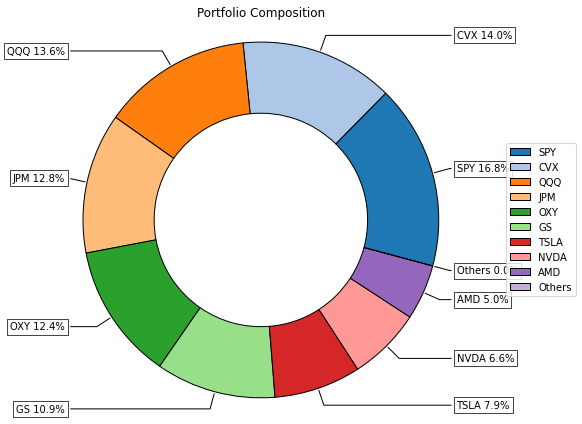

In [ ]:


import yfinance as yf
import riskfolio as rp
import warnings
warnings.filterwarnings("ignore")

#portfolio tickers
assets = ["SPY", "TSLA", "AMD","NVDA", "QQQ", "GS", "JPM", "OXY", "CVX"]

# sort tickers
assets.sort()

#download data
data = yf.download(assets, start="2016-01-01", end="2019-12-30")

# compute non-compounding, daily returns
returns = data['Adj Close'].pct_change().dropna()

port = rp.Portfolio(returns=returns)

port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)

w_rp = port.rp_optimization(
    model="Classic",  # use historical
    rm="MV",  # use mean-variance optimization
    hist=True,  # use historical scenarios
    rf=0,  # set risk free rate to 0
    b=None  # don't use constraints
)

ax = rp.plot_pie(w=w_rp)

# Higher risk stocks have lower weights to maintain overall portfolio risk target